<a href="https://colab.research.google.com/github/NguyenKiet2k2/AI/blob/main/Final_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import listdir
from numpy import asarray,save

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

train=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train.flow_from_directory('/content/drive/MyDrive/FINAL_PROJECT_AI/plant_disease_detection', target_size=(30,40), batch_size=32, class_mode='categorical')
training_set.class_indices

Found 755 images belonging to 21 classes.


{'APPLE_Blak_Rot': 0,
 'APPLE_Cedar_Rust': 1,
 'APPLE_Scrab': 2,
 'BLUEBERRY_Botrytis_Blight': 3,
 'BLUEBERRY_Mummy_Berry': 4,
 'BLUEBRRY_Silver_Leaf': 5,
 'CORN_Common_Rust': 6,
 'CORN_Ear_And_Stalk_Rot': 7,
 'ORANGE_Citrus_Canker': 8,
 'ORANGE_Citrus_Melanose': 9,
 'PEPER_Curling_Leaves': 10,
 'PEPER_Yellow_Leaves': 11,
 'POTATO_Black_Scurf _Rhizoctonia_Canker': 12,
 'POTATO_Fusarium_Dry_Rot': 13,
 'POTATO_Late_Blight': 14,
 'POTATO_Virus_Y': 15,
 'TOMATO_Bacterial_Spot': 16,
 'TOMATO_Early_Blight': 17,
 'TOMATO_Mosaic_Virus_Disease': 18,
 'TOMATO_Spider_Mite': 19,
 'TOMATO_Yellow_Leaf_Curl_Virus': 20}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same',input_shape=(30,40,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128,(3,3), activation='linear', kernel_initializer='he_uniform', padding='same')) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(256,activation='linear',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(21,activation='softmax'))
model.summary()

batch_size=128
epochs =100
classes = 21


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_set,epochs=80,batch_size=128,verbose=1)

Epoch 1/80
24/24 [==============================] - 181s 8s/step - loss: 3.2374 - accuracy: 0.0742
Epoch 2/80
24/24 [==============================] - 17s 704ms/step - loss: 2.8936 - accuracy: 0.1245
Epoch 3/80
24/24 [==============================] - 17s 711ms/step - loss: 2.7682 - accuracy: 0.1695
Epoch 4/80
24/24 [==============================] - 17s 696ms/step - loss: 2.5991 - accuracy: 0.2212
Epoch 5/80
24/24 [==============================] - 17s 705ms/step - loss: 2.5367 - accuracy: 0.2252
Epoch 6/80
24/24 [==============================] - 17s 705ms/step - loss: 2.3957 - accuracy: 0.2821
Epoch 7/80
24/24 [==============================] - 18s 709ms/step - loss: 2.2478 - accuracy: 0.3311
Epoch 8/80
24/24 [==============================] - 20s 839ms/step - loss: 2.0823 - accuracy: 0.3550
Epoch 9/80
24/24 [==============================] - 17s 720ms/step - loss: 1.9132 - accuracy: 0.4225
Epoch 10/80
24/24 [==============================] - 17s 707ms/step - loss: 1.8440 - accuracy

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.029911134392023087
Train Accuracy 0.9933775067329407


In [ ]:
model.save('/content/drive/MyDrive/Model Save/Plant_Disease_Detection.h5')

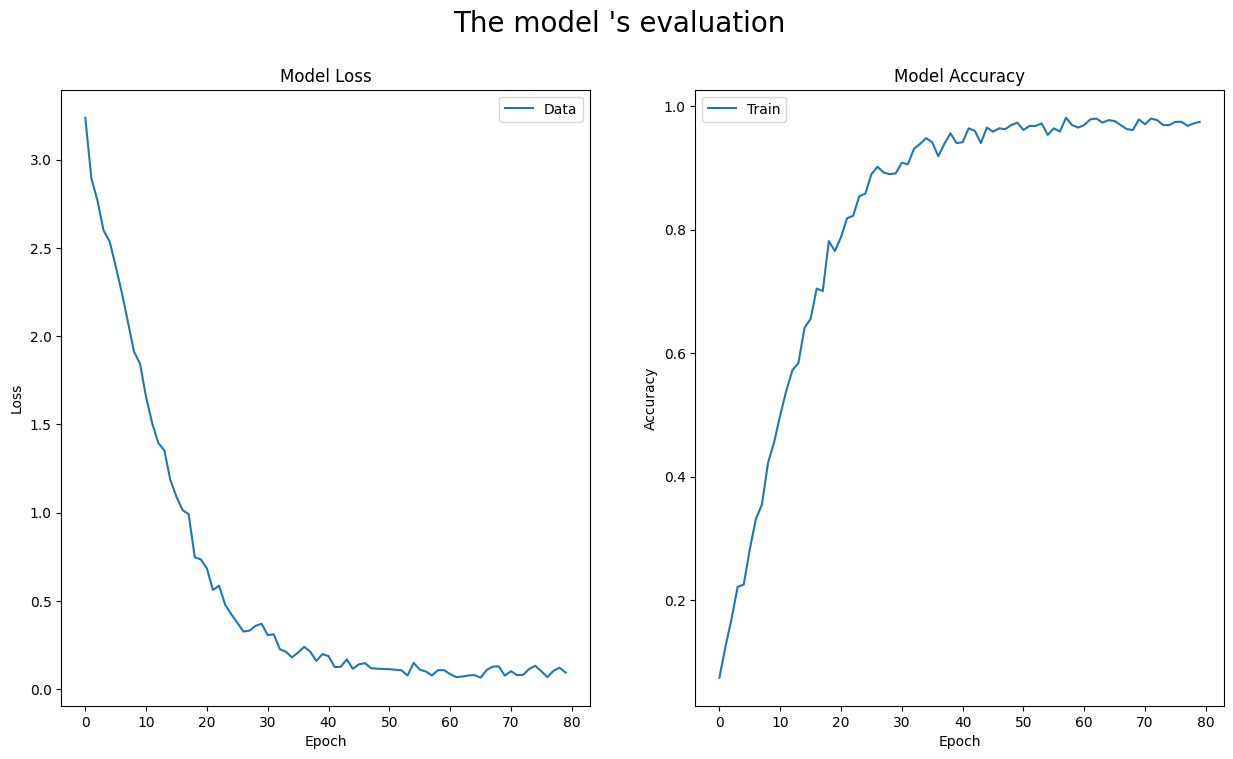

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(history.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(history.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model1= load_model('/content/drive/MyDrive/Model Save/Plant_Disease_Detection.h5')

1/1 [==============================] - 0s 36ms/step
Đây là một loại bênh có tên: Blueberry Botrytis Blight


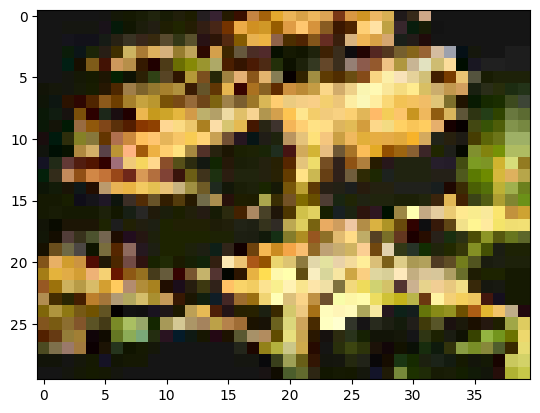

1/1 [==============================] - 0s 36ms/step
Đây là một loại bênh có tên: Apple Black Rot


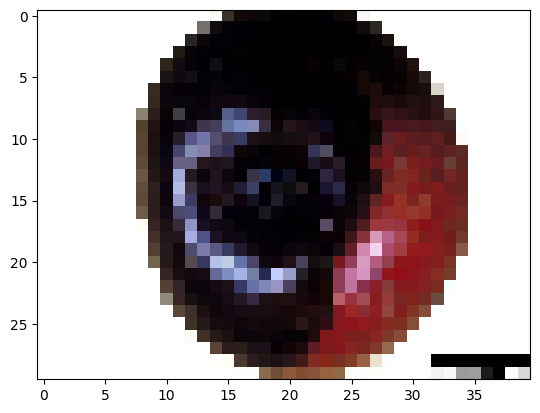

1/1 [==============================] - 0s 36ms/step
Đây là một loại bênh có tên: POTATO Fusarium Dry Rot


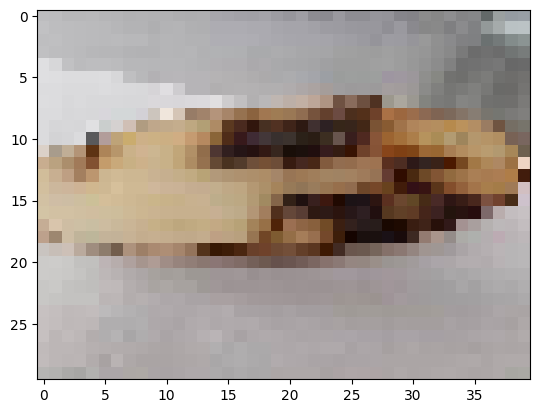

1/1 [==============================] - 0s 35ms/step
Đây là một loại bênh có tên: Pepper Yellow Leaves


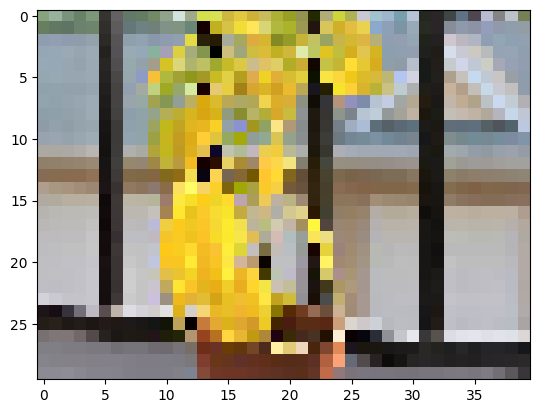

In [ ]:

folder='/content/drive/MyDrive/FINAL_PROJECT_AI/TEST/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(30,40))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model1.predict(img).argmax())
  class_name=['Apple Black Rot','Apple Cedar Rust','Apple Scrab','Blueberry Botrytis Blight','Bluebrry Mummy Berry','Blueberry Silver Leaf','Corn Common Rust','Corn Ear And Stalk Rot','Orange Citrus Canker','Orange Citrus Melanose','Pepper Curling Leaves','Pepper Yellow Leaves','Potato Black Scurf & Rhizoctonia Canker', 'POTATO Fusarium Dry Rot', 'POTATO Late Blight', 'POTATO Virus Y','TOMATO Bacterial Spot','TOMATO Early Blight','TOMATO Mosaic Virus Disease','TOMATO Spider Mite','TOMATO Yellow Leaf Curl Virus']
  print('Đây là một loại bênh có tên: {}'.format(class_name[result]))
  plt.show()